# Author Name : Aditya Nitin Pise.

# Organisation : The Sparks Foundation


## Task 1 : Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.

## Step 1 : Importing the Libraries and Dataset

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [31]:
#reading dataset
dataset = pd.read_csv("http://bit.ly/w-data")        

In [32]:
#showing top 5 rows
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
#showing number of rows and columns
dataset.shape

(25, 2)

In [34]:
#checking if dataset having any null values
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

In [35]:
#showing statistics about numerical values
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- **Dataset consists 25 examples with no null values.**
- Max value of hours studied is 9.2 hrs.
- Max value of Scores is 95%.

## Step 2 : Visualizing the Dataset

Text(0, 0.5, 'Percentage Score')

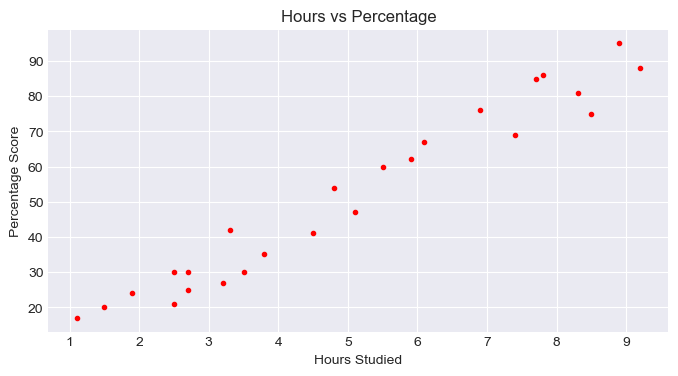

In [36]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = dataset['Hours'], y = dataset['Scores'], marker = '.', color = 'red')
plt.title('Hours vs Percentage')                    
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

- **The graph shows that there is positive linear realtionship between the number of Hours studies and Percentage Score.**

## Step 3 : Preparing the Dataset  

In [37]:
#storing independent variable in X and dependent variable in y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [38]:
#importing train_test_split method to split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**We have Spllited the dataset into training and testing sets.**

## Step 4 : Training the Model(Linear Regression)

In [39]:
#importing LinearRegression model from Sci-kit learn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
#printing coefficient and intercept of the regression model
coef = regressor.coef_
intercept = regressor.intercept_
print("Coefficient : {}".format(coef))
print("Intercept : {}".format(intercept))

Coefficient : [9.91065648]
Intercept : 2.018160041434683


**We have trained Linear Regression model on our data. Also we have the coefficient and intercept required for regression line.** 

## Step 5 : Visualizing the result

Text(0, 0.5, 'Percentage Score')

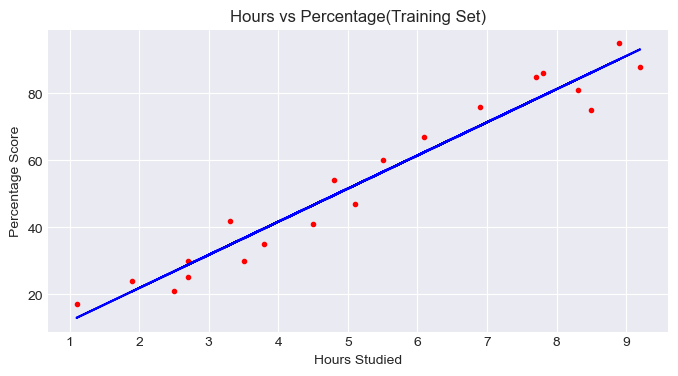

In [41]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = X_train, y = y_train, marker = '.', color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Hours vs Percentage(Training Set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

## Step 6 : Making Predictions

In [42]:
#predicting values for test set using the regression model
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [43]:
#printing actual and predicted results
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Percentage Score')

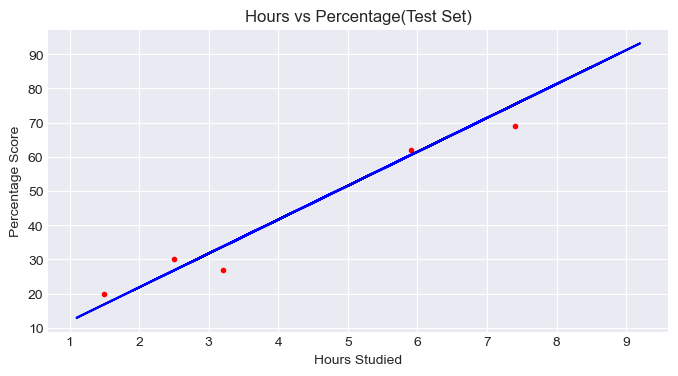

In [44]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = X_test, y = y_test, marker = '.', color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Hours vs Percentage(Test Set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

**We have compared test data with predicted data. Above graph shows that regression line has fitted well to the test data.**  

In [45]:
#predicting precentage score for random value
hours = 7.5
score = regressor.predict([[hours]])
print("With {} hours of Study you can achieve {} percentage".format(hours, round(score[0],2)))

With 7.5 hours of Study you can achieve 76.35 percentage


## Final Step : Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We'll do this by using Scikit-Learn's built-in metrics method. There are many such metrics.

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
